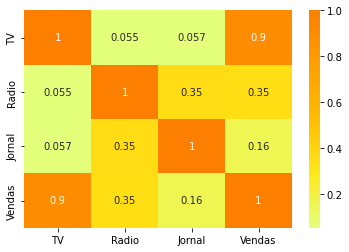

0.8863405564568397
0.8912594249556203


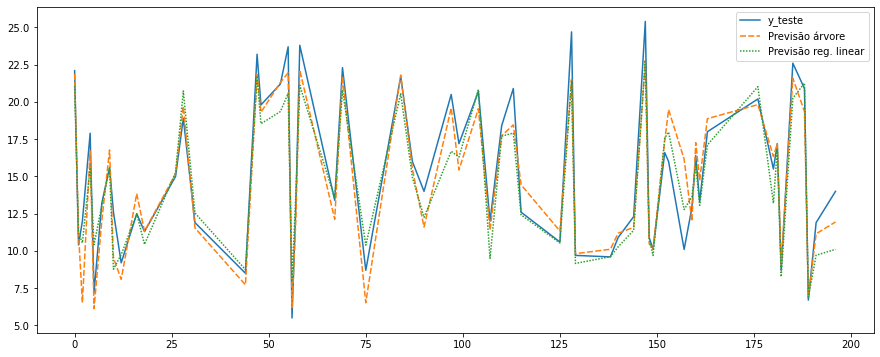

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


array([ 7.066,  8.622, 20.188])

In [2]:



# matplotlib, seaborn, plotly -> ferramentas para gerar gráficos em python
#!pip install matplotlib
#!pip install seaborn

#scikit-learn pacote utilizado para criar I.A
#!pip install scikit-learn

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#dividir a base de dados em teste e treino
from sklearn.model_selection import train_test_split 

#Modelos de Inteligência Artificial
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#Importa o r2 para verificar o melhor modelo de i.a
from sklearn.metrics import r2_score

database = pd.read_csv("advertising.csv")

#.corr() calcula a correlação
grafico = sns.heatmap(database.corr(), annot=True, cmap="Wistia")
plt.show()

# Y -> quem você quer prever -> vendas
# X -> resto da base de dados (quem você vai usar pra fazer a previsão)

y = database["Vendas"]
x = database[["TV", "Radio", "Jornal"]]

#Divide a base de dado em 4 pedaços
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


# criar I.A nos modelos de regressão linear e randomforest



modelo_regressaolinear = LinearRegression()
modelo_arvore = RandomForestRegressor()

modelo_regressaolinear.fit(x_train, y_train)
modelo_arvore.fit(x_train, y_train)

# utilize o R² para avaliar o melhor modelo
prev_reglinear = modelo_regressaolinear.predict(x_test)
prev_arvore = modelo_arvore.predict(x_test)


print(r2_score(y_test, prev_reglinear))
print(r2_score(y_test, prev_arvore))

# Visualizar previsões
auxiliar_database = pd.DataFrame()
auxiliar_database['y_teste'] = y_test
auxiliar_database['Previsão árvore'] = prev_arvore
auxiliar_database['Previsão reg. linear'] = prev_reglinear

plt.figure(figsize=(15, 6))
sns.lineplot(data=auxiliar_database)
plt.show()

#previsão de vendas para novos valores
novos = pd.read_csv("novos.csv")
display(novos)
modelo_arvore.predict(novos)